## 爬虫测试1

爬虫是大数据时代获取数据的重要方式，这里以了解*苏州市相城区*二手房价为目标，对链家的网页进行爬取，并对房价进行统计。

### 依赖库导入

In [1]:
from bs4 import BeautifulSoup
import requests
import random

In [2]:
url='https://su.lianjia.com/ershoufang/xiangcheng/?\
sug=%E7%9B%B8%E5%9F%8Ehttps://su.lianjia.com/ershoufang/xiangcheng/?sug=%E7%9B%B8%E5%9F%8E'#苏州相城区二手房搜索页第一页

In [3]:
print(url)

https://su.lianjia.com/ershoufang/xiangcheng/?sug=%E7%9B%B8%E5%9F%8Ehttps://su.lianjia.com/ershoufang/xiangcheng/?sug=%E7%9B%B8%E5%9F%8E


In [4]:
r=requests.get(url)
r.raise_for_status()
r.encoding=r.apparent_encoding

HTTPError: 403 Client Error: Forbidden for url: https://su.lianjia.com/ershoufang/xiangcheng/?sug=%E7%9B%B8%E5%9F%8Ehttps://su.lianjia.com/ershoufang/xiangcheng/?sug=%E7%9B%B8%E5%9F%8E

直接访问，结果出现了403禁止访问😸，果然只有实际上手操作的时候才会遇到各种问题

### 403 禁止访问的处理

参考某博主代码：https://blog.csdn.net/u011808673/article/details/80609221

#### 1. 增加header

In [5]:

header_choices = [
    "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.153 Safari/537.36",
    "Mozilla/5.0 (Windows NT 6.1; WOW64; rv:30.0) Gecko/20100101 Firefox/30.0",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2) AppleWebKit/537.75.14 (KHTML, like Gecko) Version/7.0.3 Safari/537.75.14",
    "Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.2; Win64; x64; Trident/6.0)",
    'Mozilla/5.0 (Windows; U; Windows NT 5.1; it; rv:1.8.1.11) Gecko/20071127 Firefox/2.0.0.11',
    'Opera/9.25 (Windows NT 5.1; U; en)',
    'Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; .NET CLR 1.1.4322; .NET CLR 2.0.50727)',
    'Mozilla/5.0 (compatible; Konqueror/3.5; Linux) KHTML/3.5.5 (like Gecko) (Kubuntu)',
    'Mozilla/5.0 (X11; U; Linux i686; en-US; rv:1.8.0.12) Gecko/20070731 Ubuntu/dapper-security Firefox/1.5.0.12',
    'Lynx/2.8.5rel.1 libwww-FM/2.14 SSL-MM/1.4.1 GNUTLS/1.2.9',
    "Mozilla/5.0 (X11; Linux i686) AppleWebKit/535.7 (KHTML, like Gecko) Ubuntu/11.04 Chromium/16.0.912.77 Chrome/16.0.912.77 Safari/535.7",
    "Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:10.0) Gecko/20100101 Firefox/10.0 "
]


In [6]:
headvalue=dict()

In [7]:
headvalue['User-Agent']=random.choice(header_choices)

In [8]:
r=requests.get(url,headers=headvalue)
r.raise_for_status()
r.encoding=r.apparent_encoding

'<!DOCTYPE html><html><head><meta http-equiv="Content-Type" content="text/html; charset=utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge" /><meta http-equiv="Cache-Control" content="no-transform" /><meta http-equiv="Cache-Control" content="no-siteapp" /><meta http-equiv="Content-language" content="zh-CN" /><meta name="format-detection" content="telephone=no" /><meta name="applicable-device" content="pc"><meta name="location" content="province=江苏;city=苏州;coord=31.3010678543,120.5811424828" /><link rel="alternate" media="only screen and (max-width: 640px)" href="https://m.lianjia.com/su/ershoufang/xiangcheng/?sug=%E7%9B%B8%E5%9F%8Ehttps://su.lianjia.com/ershoufang/xiangcheng/?sug=%E7%9B%B8%E5%9F%8E" >\n<meta name="mobile-agent" content="format=html5;url=https://m.lianjia.com/su/ershoufang/xiangcheng/?sug=%E7%9B%B8%E5%9F%8Ehttps://su.lianjia.com/ershoufang/xiangcheng/?sug=%E7%9B%B8%E5%9F%8E"><script>\nljConf = {\n    city_id: \'320500\',\n    city_abbr: \'su\',\n    city_name: \
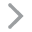
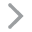

In [9]:
r.text

成功获取了第一页网站内容。

### 爬取内容

在爬取有效内容之前，需要利用浏览器，查看网页源码，找出规律。本次爬虫利用了css定位的原理，不同内容的css样式也是不同的，根据css样式来定位不同内容

In [10]:
soup=BeautifulSoup(r.text)#将结果装入beautiful soup

网页入口为搜索后的第一页，所以，观察网页后发现，每页的搜索结果的父节点的样式为sellListContent，也即我们需要找到网页样式为 class=‘sellListContent’的节点，那么，该节点内部的所有子节点即为搜索内容，这一步也是粗筛选，确定爬取内容的范围。

In [11]:
search1=soup.find_all(class_='sellListContent')#beautiful soup 提供了根据css定位的工具，也即在find以及find_all
#相关函数内部指定class_关键字即可，非常实用。（class为python关键字，因此定义了class_关键字）

In [12]:
len(search1)#这里可以看到，每一页只有一个样式为sellListContent的节点。因此在批量爬取数据的时候用find就好

1

In [13]:
search1=soup.find(class_='sellListContent')

In [14]:
type(search1)#得到一个标签变量

bs4.element.Tag

In [15]:
search1.name

'ul'

查看每条搜索记录，每个记录的标题也是搜索结果详细页的链接，这里，采用bfs搜索，其实每个搜索页只有一个层次的子节点。也即对每个搜索页的每条记录提取信息完成后，再处理下一页的内容

首先，获取搜索页中的所有结果详细信息的连接

In [16]:
itemLink=search1.find_all(class_='title')#同样采用css定位的原理

In [17]:
itemLink#到这里，已经看到搜索的连接结果了

[<div class="title"><a class="" data-el="ershoufang" data-housecode="107101617182" data-is_focus="" data-log_index="1" data-sl="" href="https://su.lianjia.com/ershoufang/107101617182.html" target="_blank">恒基旭辉发现岛  朝南  清水毛坯</a><!-- 拆分标签 --></div>,
 <div class="title"><a class="" data-el="ershoufang" data-housecode="107101483185" data-is_focus="" data-log_index="2" data-sl="" href="https://su.lianjia.com/ershoufang/107101483185.html" target="_blank">房东自住，中装，三开间朝南，诚信出售</a><!-- 拆分标签 --></div>,
 <div class="title"><a class="" data-el="ershoufang" data-housecode="107101636467" data-is_focus="" data-log_index="3" data-sl="" href="https://su.lianjia.com/ershoufang/107101636467.html" target="_blank">精装自住，维修基金已交，南北透气</a><!-- 拆分标签 --><span class="new tagBlock">新上</span></div>,
 <div class="title"><a class="" data-el="ershoufang" data-housecode="107101589174" data-is_focus="" data-log_index="4" data-sl="" href="https://su.lianjia.com/ershoufang/107101589174.html" target="_blank">御园家园多层小户72平有独立自行车库

In [18]:
pureLink=list()
for l in itemLink:
    temp=l.find('a')
    pureLink.append(temp.get('href'))

In [19]:
print(pureLink)#至此，已经完成了提取搜索结果中房屋详细页连接的工作

['https://su.lianjia.com/ershoufang/107101617182.html', 'https://su.lianjia.com/ershoufang/107101483185.html', 'https://su.lianjia.com/ershoufang/107101636467.html', 'https://su.lianjia.com/ershoufang/107101589174.html', 'https://su.lianjia.com/ershoufang/107101519001.html', 'https://su.lianjia.com/ershoufang/107101504323.html', 'https://su.lianjia.com/ershoufang/107101417984.html', 'https://su.lianjia.com/ershoufang/107101638223.html', 'https://su.lianjia.com/ershoufang/107101557528.html', 'https://su.lianjia.com/ershoufang/107101567676.html', 'https://su.lianjia.com/ershoufang/107101555846.html', 'https://su.lianjia.com/ershoufang/107101450618.html', 'https://su.lianjia.com/ershoufang/107101615903.html', 'https://su.lianjia.com/ershoufang/107101619338.html', 'https://su.lianjia.com/ershoufang/107101569712.html', 'https://su.lianjia.com/ershoufang/107101521368.html', 'https://su.lianjia.com/ershoufang/107101439507.html', 'https://su.lianjia.com/ershoufang/107101578313.html', 'https://

### 提取房屋详细信息

进入房屋详细信息后比如如下链接：
https://su.lianjia.com/ershoufang/107101617182.html

进入链接可以根据源码看大，利用css定位的原理，我们感兴趣的内容的css标签为，price ，houseInfo，aroundInfo，introContent，也将分几步，分别提取上述标签内部的感兴趣信息

In [20]:
detailUrl='https://su.lianjia.com/ershoufang/107101617182.html'
headvalue['User-Agent']=random.choice(header_choices)
r_detail=requests.get(detailUrl,headers=headvalue)
r_detail.raise_for_status()
r_detail.encoding=r.apparent_encoding

In [21]:
#利用词典保存结果
houseInfo=dict()

In [22]:
house_detail=BeautifulSoup(r_detail.text)

In [23]:
price_info=house_detail.find(class_='price')

In [24]:
print(price_info)

<div class="price "><span class="total">73</span><span class="unit"><span>万</span></span><div class="text"><div class="unitPrice"><span class="unitPriceValue">15209<i>元/平米</i></span></div><div class="tax im-talk LOGCLICKDATA" data-lj_action_event="WebClick" data-lj_action_pid="lianjiaweb" data-lj_action_source_type="二手房源详情首付预算" data-lj_evtid="13903" data-msg-payload="您好，请问该套房源首付是多少？" data-source-extends='{"house_code":"107101617182"}' data-source-port="pc_lianjia_ershou_main_zaixianxiangqing_shoufuyusuan" data-ucid="1000001000221267"><span class="taxtext">首付及贷款情况请咨询经纪人</span><i></i></div><!-- <div class="tax"><span class="taxtext" title="首付37万 税费"><span>首付37万 </span><span>税费</span><span><span id="PanelTax">13.8</span>万(仅供参考) </span></span><span class="detail" id="lookdetail">详情</span></div> --></div><div class="removeIcon"></div></div>


In [25]:
houseInfo['总价']=price_info.find(class_='total').text

In [26]:
houseInfo['总价单位']=price_info.find(class_='unit').text

In [27]:
houseInfo['单价']=price_info.find(class_='unitPriceValue').next_element
houseInfo['单价单位']=price_info.find(class_='unitPriceValue').next_element.next_element.next_element

In [28]:
housInfo__=house_detail.find(class_='houseInfo')


In [29]:

houseInfo['房屋年代']=housInfo__.find(class_='area').find(class_='subInfo').text

In [30]:
aroundInfo=house_detail.find(class_='aroundInfo')
houseInfo['小区名称']=aroundInfo.find(class_='communityName').find(class_='info').text

In [31]:
houseInfo['所在区域']=aroundInfo.find(class_='areaName').find(class_='info').text

In [32]:
introContent=house_detail.find(class_='introContent')
infoList=introContent.find(class_='content').find_all('li')
houseInfo['户型']=infoList[0].next_element.next_element.next_element
houseInfo['楼层']=infoList[1].next_element.next_element.next_element
houseInfo['建筑面积']=infoList[2].next_element.next_element.next_element
houseInfo['房屋朝向']=infoList[6].next_element.next_element.next_element
houseInfo['装修情况']=infoList[8].next_element.next_element.next_element
houseInfo['梯户比例']=infoList[9].next_element.next_element.next_element
houseInfo['产权年限']=infoList[11].next_element.next_element.next_element

In [33]:
houseInfo

{'总价': '73',
 '总价单位': '万',
 '单价': '15209',
 '单价单位': '元/平米',
 '房屋年代': '2017年建/板楼',
 '小区名称': '恒基旭辉发现岛',
 '所在区域': '相城\xa0活力岛\xa0中环至外环',
 '户型': '2室1厅1厨1卫',
 '楼层': '中楼层 (共20层)',
 '建筑面积': '48㎡',
 '房屋朝向': '南',
 '装修情况': '毛坯',
 '梯户比例': '四梯三十八户',
 '产权年限': '40年'}

### 切换搜索结果页面

找到最下方，css为pagebox页面

In [34]:
pagebox=soup.find(class_='page-box house-lst-page-box')

In [35]:
pagebox

<div class="page-box house-lst-page-box" comp-module="page" page-data='{"totalPage":100,"curPage":1}' page-url="/ershoufang/xiangcheng/pg{page}/?sug=%E7%9B%B8%E5%9F%8E"></div>

In [36]:
curPage=pagebox.get('page-data')

In [37]:
curPage

'{"totalPage":100,"curPage":1}'

In [38]:
import json

In [39]:
pj=json.loads(curPage)

In [40]:
pj

{'totalPage': 100, 'curPage': 1}

In [41]:
curPage=pj['curPage']

In [42]:
totalPage=pj['totalPage']

In [55]:
baseUrl=pagebox.get('page-url')

In [58]:
newUrl=str('su.lianjia.com')+baseUrl.format(page=3)

In [59]:
newUrl

'su.lianjia.com/ershoufang/xiangcheng/pg3/?sug=%E7%9B%B8%E5%9F%8E'

In [53]:
baseUrl

'/ershoufang/xiangcheng/pg{page}/?sug=%E7%9B%B8%E5%9F%8E'

In [47]:
https://su.lianjia.com/ershoufang/pg2rs%E7%9B%B8%E5%9F%8E/

SyntaxError: invalid syntax (<ipython-input-47-349a8863451d>, line 1)